<a href="https://colab.research.google.com/github/Malu2810/-Improving-vessel-performance-using-deep-learning/blob/main/sih_hs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv")
df

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
...,...,...,...,...,...,...,...
43723,30/06/2019 21:30,2.299,3.60,9.281,12.765,94.0,21.95
43724,30/06/2019 22:00,2.075,3.04,9.303,12.722,95.0,21.95
43725,30/06/2019 22:30,2.157,3.43,9.168,12.890,97.0,21.95
43726,30/06/2019 23:00,2.087,2.84,8.706,10.963,92.0,21.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43728 entries, 0 to 43727
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date/Time       43728 non-null  object 
 1   Hs              43728 non-null  float64
 2   Hmax            43728 non-null  float64
 3   Tz              43728 non-null  float64
 4   Tp              43728 non-null  float64
 5   Peak Direction  43728 non-null  float64
 6   SST             43728 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [ ]:
df.replace(-99.90, np.nan, inplace=True)
df.drop('Date/Time', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,0.763,1.15,4.520,5.513,49.0,25.65
1,0.770,1.41,4.582,5.647,75.0,25.50
2,0.747,1.16,4.515,5.083,91.0,25.45
3,0.718,1.61,4.614,6.181,68.0,25.45
4,0.707,1.34,4.568,4.705,73.0,25.50


In [ ]:
df1 = df.loc[:, ['Hs']]
df1.head()

,Hs
0,0.763
1,0.770
2,0.747
3,0.718
4,0.707


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
print('Shape of the scaled data matrix: ', df1.shape)

Shape of the scaled data matrix:  (43454, 1)


In [ ]:
df1 =pd.DataFrame(df1)
train = df1[:42000]
test = df1[42000:]
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (42000, 1)
Shape of test data:  (1454, 1)


In [ ]:
def prepare_data(data):
    databatch = 3
    x_list = []
    y_list = []
    data = list(data[0])
    for i in range(len(data)-databatch-1):
        x_list.append(data[i:i+databatch])
        y_list.append(data[i+databatch+1])

    X_data = np.array(x_list)
    X_data = np.expand_dims(X_data,axis=1)
    X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], X_data.shape[2]))
    y_data = np.array(y_list)
    y_data = np.expand_dims(y_data,axis=1)

    return X_data, y_data


In [ ]:
X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
print('X_train Shape : ', X_train.shape, 'y_train shape :', y_train.shape)
print('X_test Shape  : ', X_test.shape, ' y_test shape  :', y_test.shape)

X_train Shape :  (41996, 1, 3) y_train shape : (41996, 1)
X_test Shape  :  (1450, 1, 3)  y_test shape  : (1450, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
def lstm_model(x_data, y_data, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(100, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(25))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(x_data, y_data, validation_split=0.25, epochs=num_epochs, batch_size=batch_size)
    return model, history


In [ ]:
history = lstm_model(X_train, y_train, num_epochs=15, batch_size=100, learning_rate=.001)

Epoch 1/15
315/315 [==============================] - 14s 18ms/step - loss: 0.0059 - val_loss: 5.4788e-04
Epoch 2/15
315/315 [==============================] - 3s 10ms/step - loss: 5.1493e-04 - val_loss: 5.0118e-04
Epoch 3/15
315/315 [==============================] - 3s 10ms/step - loss: 4.9844e-04 - val_loss: 5.0698e-04
Epoch 4/15
315/315 [==============================] - 3s 11ms/step - loss: 4.9105e-04 - val_loss: 4.8892e-04
Epoch 5/15
315/315 [==============================] - 5s 14ms/step - loss: 4.8604e-04 - val_loss: 5.0023e-04
Epoch 6/15
315/315 [==============================] - 3s 10ms/step - loss: 4.7895e-04 - val_loss: 4.9808e-04
Epoch 7/15
315/315 [==============================] - 3s 10ms/step - loss: 4.7817e-04 - val_loss: 4.7982e-04
Epoch 8/15
315/315 [==============================] - 4s 12ms/step - loss: 4.7780e-04 - val_loss: 5.0580e-04
Epoch 9/15
315/315 [==============================] - 4s 12ms/step - loss: 4.7778e-04 - val_loss: 4.8689e-04
Epoch 10/15
315/315 [=

In [ ]:
print(history)

(<keras.src.engine.sequential.Sequential object at 0x7e31bd191180>, <keras.src.callbacks.History object at 0x7e31bc8c7070>)


In [ ]:
def predicting(data, y_real):
    predicted_data = history[0].predict(data)
    # Invert scaling process to get the normal values range for the features
    predicted_data = scaler.inverse_transform(predicted_data)
    y_real = scaler.inverse_transform(y_real)
    print(y_real)
    return predicted_data, y_real

In [ ]:
train_prediction, y_train = predicting(X_train, y_train)
test_prediction, y_test = predicting(X_test, y_test)

1313/1313 [==============================] - 4s 2ms/step
[[0.707]
 [0.729]
 [0.733]
 ...
 [0.544]
 [0.543]
 [0.545]]
46/46 [==============================] - 0s 2ms/step
[[0.565]
 [0.533]
 [0.562]
 ...
 [2.157]
 [2.087]
 [1.926]]


In [ ]:
import math
from sklearn.metrics import mean_squared_error
print('Trainin Data Errors')
print(mean_squared_error(y_train[0], train_prediction[0]),'\n')
print('Test Data Errors')
print(mean_squared_error(y_test[0], test_prediction[0]))


Trainin Data Errors
0.002160851912547812 

Test Data Errors
5.52882808663046e-06


Predictions are in Red
Observed are in Blue
For the ease of understanding the model, the real and predicted datas are limited by 144 samples which means 72hr(Samples from 1279-1423).


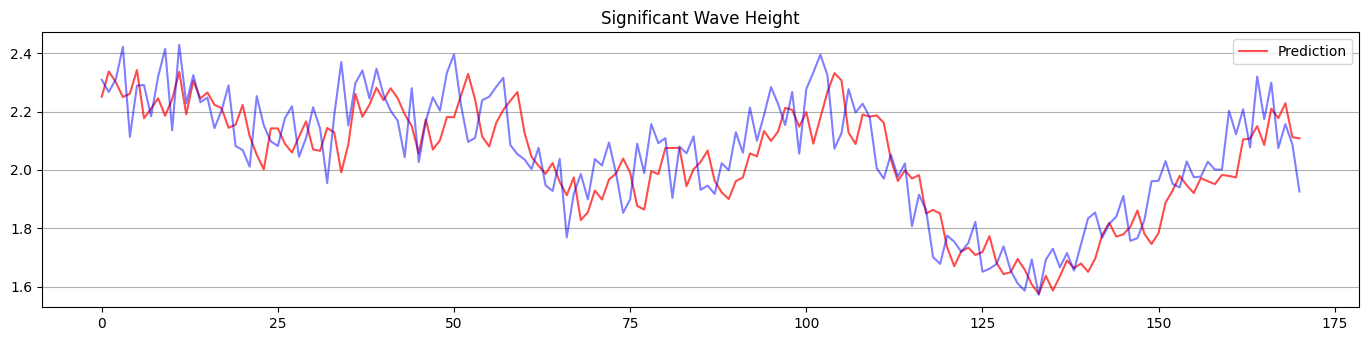

In [ ]:
from matplotlib import pyplot as plt
print("Predictions are in Red")
print("Observed are in Blue")
print("For the ease of understanding the model, the real and predicted datas are limited by 144 samples which means 72hr(Samples from 1279-1423).")
print("================================")
plt.figure(figsize=(17,25))
plt.subplot(6,1,1)
plt.plot(test_prediction[1279:,0], color='red', alpha=0.7, label='Prediction')
plt.title('Significant Wave Height')
plt.legend()
plt.plot(y_test[1279:,0], color='blue', alpha=0.5, label='Observed')
plt.grid(visible=True, axis='y')

In [ ]:
x_input = np.array([0.875,0.763,0.77,0.747])
hs_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(hs_input)>3):
        x_input=np.array(hs_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1,1,3))
        model = history[0].predict(x_input, verbose=0)
        print("{} day output {}".format(i,model))
        hs_input.append(model[0][0])
        hs_input=hs_input[1:]
        lst_output.append(model[0][0])
        i=i+1
    else:
      x_input = x_input.reshape((1,1,3))
      model =history[0].predict(x_input, verbose=0)
      print(model[0])
      hs_input.append(model[0][0])
      lst_output.append(model[0][0])
      i=i+1


print(lst_output)
lst_output=np.array(lst_output)


0 day input [0.763 0.77  0.747]
0 day output [[0.7259028]]
1 day input [0.77      0.747     0.7259028]
1 day output [[0.70832705]]
2 day input [0.747      0.7259028  0.70832705]
2 day output [[0.69156635]]
3 day input [0.7259028  0.70832705 0.69156635]
3 day output [[0.6761388]]
4 day input [0.70832705 0.69156635 0.6761388 ]
4 day output [[0.66177154]]
5 day input [0.69156635 0.6761388  0.66177154]
5 day output [[0.6483263]]
6 day input [0.6761388  0.66177154 0.6483263 ]
6 day output [[0.6356973]]
7 day input [0.66177154 0.6483263  0.6356973 ]
7 day output [[0.6237876]]
8 day input [0.6483263 0.6356973 0.6237876]
8 day output [[0.6125177]]
9 day input [0.6356973 0.6237876 0.6125177]
9 day output [[0.6018196]]
[0.7259028, 0.70832705, 0.69156635, 0.6761388, 0.66177154, 0.6483263, 0.6356973, 0.6237876, 0.6125177, 0.6018196]


following la konjam doubt

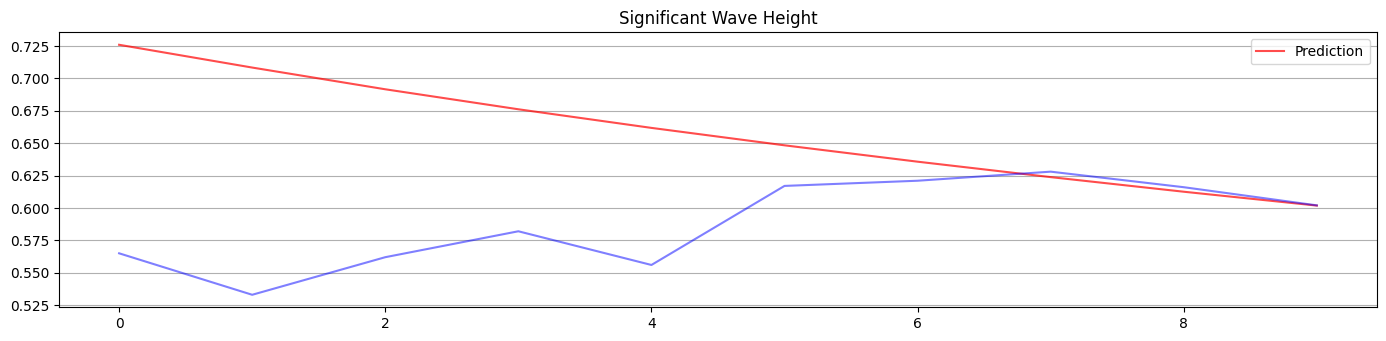

In [ ]:
plt.figure(figsize=(17,25))
plt.subplot(6,1,1)
plt.plot(lst_output, color='red', alpha=0.7, label='Prediction')
plt.title('Significant Wave Height')
plt.legend()
plt.plot(y_test[:10], color='blue', alpha=0.5, label='Observed')
plt.grid(visible=True, axis='y')